In [1]:
!pip install transformers
!pip install scikit-learn
!pip install transformers[torch]
!pip install accelerate -U
!pip install pandas
!pip install matplotlib

  Using cached transformers-4.39.3-py3-none-any.whl.metadata (134 kB)
  Using cached huggingface_hub-0.22.2-py3-none-any.whl.metadata (12 kB)
  Using cached regex-2023.12.25-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached tokenizers-0.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached safetensors-0.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
Using cached transformers-4.39.3-py3-none-any.whl (8.8 MB)
Using cached huggingface_hub-0.22.2-py3-none-any.whl (388 kB)
Using cached regex-2023.12.25-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (785 kB)
Using cached safetensors-0.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
Using cached tokenizers-0.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
Using cached fsspec-2024.3.1-py3-none-any.whl (

In [2]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
raw_data = pd.read_csv('Step2_fake.csv')
print(raw_data.shape)
print(raw_data['language'].unique())

# Removing rows where article is not in English
raw_data = raw_data[raw_data['language'] == 'english']
print(raw_data.shape)
display(raw_data)

(12999, 20)
['english' 'ignore' 'german' 'french' 'spanish' 'russian' 'greek'
 'finnish' 'portuguese' 'arabic' 'dutch' 'italian' 'turkish' 'norwegian'
 'chinese' 'polish']
(12403, 20)


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,f1b5d0e44803f48732bde854a9fdf95837219b12,2,replaceme,2016-10-26T23:58:00.000+03:00,NaN,It DOES allow you to put a dog face on top of ...,english,2016-10-27T00:37:46.194+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12995,36011ceba3647e1bea78299b68b6fb705a1fc1ad,3,Freedumb,2016-10-27T00:02:00.000+03:00,NaN,Wait till you see what happens to the valuatio...,english,2016-10-27T00:37:46.220+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12996,6995d1aa9ac99926106489b14b5530e85358059a,4,major major maj...,2016-10-27T00:06:00.000+03:00,NaN,I'm waiting for the one that puts a pussy on m...,english,2016-10-27T00:37:46.244+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,5,beemasters,2016-10-27T00:09:00.000+03:00,NaN,$4 Billion even after they are known to be kee...,english,2016-10-27T00:37:46.247+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs


In [6]:
selected_col = ['text', 'type']
filtered_col = raw_data[selected_col]
filtered_col = filtered_col.reset_index(drop=True)
print(filtered_col.shape)
display(filtered_col)

(12403, 2)


,text,type
0,Print They should pay all the back all the mon...,bias
1,Why Did Attorney General Loretta Lynch Plead T...,bias
2,Red State : \nFox News Sunday reported this mo...,bias
3,Email Kayla Mueller was a prisoner and torture...,bias
4,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias
...,...,...
12398,It DOES allow you to put a dog face on top of ...,bs
12399,Wait till you see what happens to the valuatio...,bs
12400,I'm waiting for the one that puts a pussy on m...,bs
12401,$4 Billion even after they are known to be kee...,bs


In [7]:
# Checking distribution of types
filtered_col['type'].unique()
filtered_col['type'].value_counts()

type
bs            10900
bias            443
conspiracy      430
hate            243
satire          146
state           120
junksci         102
fake             19
Name: count, dtype: int64

In [8]:
# Removing 'state' type news
filtered_col = filtered_col[filtered_col['type'] != 'state']
filtered_col = filtered_col.reset_index(drop=True)
print(filtered_col.shape)
display(filtered_col)

(12283, 2)


,text,type
0,Print They should pay all the back all the mon...,bias
1,Why Did Attorney General Loretta Lynch Plead T...,bias
2,Red State : \nFox News Sunday reported this mo...,bias
3,Email Kayla Mueller was a prisoner and torture...,bias
4,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias
...,...,...
12278,It DOES allow you to put a dog face on top of ...,bs
12279,Wait till you see what happens to the valuatio...,bs
12280,I'm waiting for the one that puts a pussy on m...,bs
12281,$4 Billion even after they are known to be kee...,bs


In [9]:
# Combining articles with bs and fake labels. basically relabelling fake to bs
# Reason: similar content, and few articles with fake type compared to the other types
filtered_col['type'] = filtered_col['type'].replace('fake', 'bs')

# Reducing number of articles to even out distribution of types, randomly selecting 450 to remain in df
bs_rows = filtered_col[filtered_col['type'] == 'bs']
selected_bs_rows = bs_rows.sample(n=450, random_state=42)
# Drop the unselected rows from the original DataFrame
filtered_col = filtered_col.drop(bs_rows.index.difference(selected_bs_rows.index))
filtered_col = filtered_col.reset_index(drop=True)

display(filtered_col)

# Checking distribution of types
filtered_col['type'].unique()
filtered_col['type'].value_counts()

,text,type
0,Print They should pay all the back all the mon...,bias
1,Why Did Attorney General Loretta Lynch Plead T...,bias
2,Red State : \nFox News Sunday reported this mo...,bias
3,Email Kayla Mueller was a prisoner and torture...,bias
4,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias
...,...,...
1809,don't we have the receipt?,bs
1810,... and this is how .gov smash expectations .....,bs
1811,But I think it should be mathematically fluid ...,bs
1812,non gaap has always been bullshit.,bs


type
bs            450
bias          443
conspiracy    430
hate          243
satire        146
junksci       102
Name: count, dtype: int64

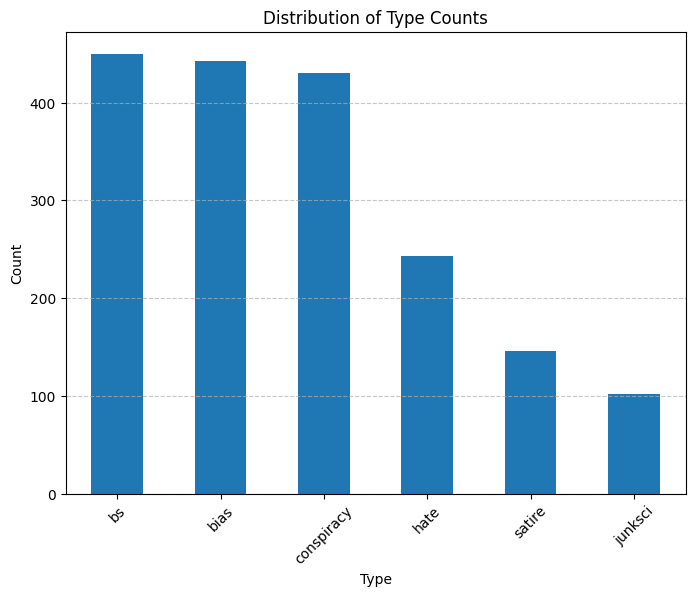

In [10]:
# Visualise distribution of fake news types after data trimming

type_counts = filtered_col['type'].value_counts()

plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar')
plt.title('Distribution of Type Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# Create a new column: It contains the labels mapped to numbers
filtered_col['label'] = filtered_col['type'].map({'bs': 0, 'bias': 1, 'conspiracy': 2, 'hate': 3, 'satire': 4, 'junksci': 5})
display(filtered_col)
filtered_col['label'].unique()
filtered_col['label'].value_counts()

,text,type,label
0,Print They should pay all the back all the mon...,bias,1
1,Why Did Attorney General Loretta Lynch Plead T...,bias,1
2,Red State : \nFox News Sunday reported this mo...,bias,1
3,Email Kayla Mueller was a prisoner and torture...,bias,1
4,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias,1
...,...,...,...
1809,don't we have the receipt?,bs,0
1810,... and this is how .gov smash expectations .....,bs,0
1811,But I think it should be mathematically fluid ...,bs,0
1812,non gaap has always been bullshit.,bs,0


label
0    450
1    443
2    430
3    243
4    146
5    102
Name: count, dtype: int64

In [12]:
print(filtered_col.isnull().sum())

text     46
type      0
label     0
dtype: int64


In [13]:
# Filter rows where 'text' is not null
filtered_col = filtered_col.dropna(subset=['text'])
filtered_col = filtered_col[filtered_col['text'].astype(str).str.strip() != ""]

print(filtered_col.isnull().sum())

text     0
type     0
label    0
dtype: int64


In [14]:
all_non_empty_strings = filtered_col['text'].apply(lambda x: isinstance(x, str) and x.strip() != "").all()

print("Are all values in the 'text' column non-empty strings?", all_non_empty_strings)

Are all values in the 'text' column non-empty strings? True


In [15]:
filtered_col = filtered_col.reset_index(drop=True)
display(filtered_col)

,text,type,label
0,Print They should pay all the back all the mon...,bias,1
1,Why Did Attorney General Loretta Lynch Plead T...,bias,1
2,Red State : \nFox News Sunday reported this mo...,bias,1
3,Email Kayla Mueller was a prisoner and torture...,bias,1
4,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias,1
...,...,...,...
1758,don't we have the receipt?,bs,0
1759,... and this is how .gov smash expectations .....,bs,0
1760,But I think it should be mathematically fluid ...,bs,0
1761,non gaap has always been bullshit.,bs,0


In [16]:
df = filtered_col.copy()
display(df)

,text,type,label
0,Print They should pay all the back all the mon...,bias,1
1,Why Did Attorney General Loretta Lynch Plead T...,bias,1
2,Red State : \nFox News Sunday reported this mo...,bias,1
3,Email Kayla Mueller was a prisoner and torture...,bias,1
4,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias,1
...,...,...,...
1758,don't we have the receipt?,bs,0
1759,... and this is how .gov smash expectations .....,bs,0
1760,But I think it should be mathematically fluid ...,bs,0
1761,non gaap has always been bullshit.,bs,0


### Removing non-English words and stopwords

In [17]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [18]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

# Function to remove non-English words and stopwords
def clean_text(text):
    english_words = set(nltk.corpus.words.words())
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    cleaned_words = [word.lower() for word in words if word.lower() in english_words and word.lower() not in stop_words]
    return ' '.join(cleaned_words)

df['cleaned_text'] = df['text'].apply(clean_text)

# Reset index
df = df.reset_index(drop=True)

display(df)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/jovyan/nltk_data...
[nltk_data]   Package words is already up-to-date!


,text,type,label,cleaned_text
0,Print They should pay all the back all the mon...,bias,1,print pay back money plus interest entire fami...
1,Why Did Attorney General Loretta Lynch Plead T...,bias,1,attorney general lynch plead fifth barracuda b...
2,Red State : \nFox News Sunday reported this mo...,bias,1,red state fox news morning yes investigation c...
3,Email Kayla Mueller was a prisoner and torture...,bias,1,prisoner tortured chance horrific story father...
4,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias,1,reform make great since march people suffer in...
...,...,...,...,...
1758,don't we have the receipt?,bs,0,receipt
1759,... and this is how .gov smash expectations .....,bs,0,smash cost pentagon billion two
1760,But I think it should be mathematically fluid ...,bs,0,think mathematically fluid dont want put besid...
1761,non gaap has always been bullshit.,bs,0,non always


In [19]:
# Removing any rows which have empty strings = no article text
df = df.dropna(subset=['cleaned_text'])
df = df[df['cleaned_text'].astype(str).str.strip() != ""]

print(df.isnull().sum())

all_non_empty_strings = df['cleaned_text'].apply(lambda x: isinstance(x, str) and x.strip() != "").all()
print("Are all values in the 'text' column non-empty strings?", all_non_empty_strings)

df = df.reset_index(drop=True)
display(df)

text            0
type            0
label           0
cleaned_text    0
dtype: int64
Are all values in the 'text' column non-empty strings? True


,text,type,label,cleaned_text
0,Print They should pay all the back all the mon...,bias,1,print pay back money plus interest entire fami...
1,Why Did Attorney General Loretta Lynch Plead T...,bias,1,attorney general lynch plead fifth barracuda b...
2,Red State : \nFox News Sunday reported this mo...,bias,1,red state fox news morning yes investigation c...
3,Email Kayla Mueller was a prisoner and torture...,bias,1,prisoner tortured chance horrific story father...
4,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias,1,reform make great since march people suffer in...
...,...,...,...,...
1754,don't we have the receipt?,bs,0,receipt
1755,... and this is how .gov smash expectations .....,bs,0,smash cost pentagon billion two
1756,But I think it should be mathematically fluid ...,bs,0,think mathematically fluid dont want put besid...
1757,non gaap has always been bullshit.,bs,0,non always


In [20]:
df.to_csv('step2_cleaned_dataset.csv', index=False)

### Training Model

In [4]:
df = pd.read_csv('step2_cleaned_dataset.csv')

In [5]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

model_name = "distilgpt2"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6)

# Tokenization
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.padding_side = "right"  # Ensure padding is added to the right side of the sequences
tokenizer.pad_token = tokenizer.eos_token  # Use the end-of-sequence token as the padding token

# Ensure padding token is defined in the model configuration
if model.config.pad_token_id is None:
    model.config.pad_token_id = tokenizer.pad_token_id  # Set pad token ID in model configuration

train_texts, test_texts, train_labels, test_labels = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(test_texts, test_labels, test_size=0.5, random_state=42)

# Data Encoding
max_length = 128
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=max_length)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=max_length)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=max_length)

# Converting labels to tensors
train_labels = torch.tensor(train_labels.tolist())
val_labels = torch.tensor(val_labels.tolist())
test_labels = torch.tensor(test_labels.tolist())

# Creating DataLoaders
train_dataset = TensorDataset(torch.tensor(train_encodings.input_ids), torch.tensor(train_encodings.attention_mask), train_labels)
val_dataset = TensorDataset(torch.tensor(val_encodings.input_ids), torch.tensor(val_encodings.attention_mask), val_labels)
test_dataset = TensorDataset(torch.tensor(test_encodings.input_ids), torch.tensor(test_encodings.attention_mask), test_labels)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Training
epochs = 10
for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    accuracy = correct / total
    print(f"Epoch {epoch+1}/{epochs}, Loss: {val_loss}, Accuracy: {accuracy}")


/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10, Loss: 1.5894609147852117, Accuracy: 0.36363636363636365
Epoch 2/10, Loss: 1.481784918091514, Accuracy: 0.42613636363636365
Epoch 3/10, Loss: 1.3258457508954136, Accuracy: 0.48295454545454547
Epoch 4/10, Loss: 1.232255388389934, Accuracy: 0.5284090909090909
Epoch 5/10, Loss: 1.2224152413281528, Accuracy: 0.5170454545454546
Epoch 6/10, Loss: 1.5390409231185913, Accuracy: 0.44886363636363635
Epoch 7/10, Loss: 1.244025999849493, Accuracy: 0.5454545454545454
Epoch 8/10, Loss: 1.2878328778527, Accuracy: 0.5511363636363636
Epoch 9/10, Loss: 1.3977198600769043, Accuracy: 0.5227272727272727
Epoch 10/10, Loss: 1.3847596049308777, Accuracy: 0.5681818181818182


In [6]:
from sklearn.metrics import classification_report

# Testing with test dataset
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        _, predicted = torch.max(outputs.logits, 1)
        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

print("Classification Report:")
print(classification_report(true_labels, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.53      0.49        43
           1       0.68      0.54      0.60        39
           2       0.69      0.55      0.61        49
           3       0.41      0.41      0.41        22
           4       0.74      0.93      0.82        15
           5       0.36      0.62      0.45         8

    accuracy                           0.56       176
   macro avg       0.55      0.60      0.57       176
weighted avg       0.58      0.56      0.57       176



#### Trialing different optimizers - Adam, SGD, RMSProp

In [5]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

model_name = "distilgpt2"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6)

# Tokenization
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.padding_side = "right"  # Padding is added to the right side of the sequences
tokenizer.pad_token = tokenizer.eos_token  # Usingend-of-sequence token as the padding token

# Ensure padding token is defined in the model configuration
if model.config.pad_token_id is None:
    model.config.pad_token_id = tokenizer.pad_token_id  # Set pad token ID in model configuration

train_texts, test_texts, train_labels, test_labels = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(test_texts, test_labels, test_size=0.5, random_state=42)

# Data Encoding
max_length = 128
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=max_length)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=max_length)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=max_length)

# Converting labels to tensors
train_labels = torch.tensor(train_labels.tolist())
val_labels = torch.tensor(val_labels.tolist())
test_labels = torch.tensor(test_labels.tolist())

# Create DataLoader for training, validation, and testing
train_dataset = TensorDataset(torch.tensor(train_encodings.input_ids), torch.tensor(train_encodings.attention_mask), train_labels)
val_dataset = TensorDataset(torch.tensor(val_encodings.input_ids), torch.tensor(val_encodings.attention_mask), val_labels)
test_dataset = TensorDataset(torch.tensor(test_encodings.input_ids), torch.tensor(test_encodings.attention_mask), test_labels)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

loss_fn = torch.nn.CrossEntropyLoss()

# Trying with different optimizers
optimizers = [
    (torch.optim.Adam(model.parameters(), lr=2e-5), 0),  # Initialize with 0 accuracy
    (torch.optim.SGD(model.parameters(), lr=0.01), 0),
    (torch.optim.RMSprop(model.parameters(), lr=0.001), 0),
]

best_optimizer = None
best_val_accuracy = 0

# Training
epochs = 10
for optimizer, _ in optimizers:
    print(f"Training with optimizer: {optimizer}")
    for epoch in range(epochs):
        model.train()
        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            optimizer.zero_grad()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch in val_loader:
                input_ids, attention_mask, labels = batch
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                val_loss += outputs.loss.item()
                _, predicted = torch.max(outputs.logits, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        accuracy = correct / total
        print(f"Epoch {epoch+1}/{epochs}, Loss: {val_loss}, Accuracy: {accuracy}")

        # Update optimizer's validation accuracy
        for i, (opt, acc) in enumerate(optimizers):
            if opt == optimizer:
                optimizers[i] = (opt, accuracy)
                break

        # Update best optimizer if current optimizer has higher validation accuracy
        if accuracy > best_val_accuracy:
            best_optimizer = optimizer
            best_val_accuracy = accuracy

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training with optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 2e-05
    maximize: False
    weight_decay: 0
)
Epoch 1/10, Loss: 1.5057642459869385, Accuracy: 0.4090909090909091
Epoch 2/10, Loss: 1.2876069979234175, Accuracy: 0.42613636363636365
Epoch 3/10, Loss: 1.242465783249248, Accuracy: 0.4659090909090909
Epoch 4/10, Loss: 1.1951186494393782, Accuracy: 0.5056818181818182
Epoch 5/10, Loss: 1.2595288265835156, Accuracy: 0.4943181818181818
Epoch 6/10, Loss: 1.456801414489746, Accuracy: 0.5113636363636364
Epoch 7/10, Loss: 1.4824221350929954, Accuracy: 0.5397727272727273
Epoch 8/10, Loss: 1.4592302279038862, Accuracy: 0.5511363636363636
Epoch 9/10, Loss: 1.4621436108242383, Accuracy: 0.5625
Epoch 10/10, Loss: 1.4318311539563267, Accuracy: 0.5568181818181818
Training with optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    

In [6]:
from sklearn.metrics import classification_report

# Retrain with the best optimizer before testing
print(f"Retraining with the best optimizer: {best_optimizer}")
model.train()
for epoch in range(epochs):
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        best_optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        best_optimizer.step()

# Testing with the best optimizer after retraining
print(f"Testing with the best optimizer: {best_optimizer}")
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        _, predicted = torch.max(outputs.logits, 1)
        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

print("Classification Report:")
print(classification_report(true_labels, predictions))


Retraining with the best optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 2e-05
    maximize: False
    weight_decay: 0
)
Testing with the best optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 2e-05
    maximize: False
    weight_decay: 0
)
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.44      0.34        43
           1       0.62      0.38      0.48        39
           2       0.54      0.63      0.58        49
           3       0.28      0.23      0.25        22
           4       0.33      0.07      0.11        15
           5       0.33      0.25      0.29         8

    accuracy                           0.41       176
   macro avg       0.40      0.3